Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [5]:
import pandas as pd

In [6]:
yelp_df = pd.read_csv(r"C:\Users\johnk\OneDrive\Desktop\Statistical-Modelling-Project\Statistical-Modelling-Project\notebooks\yelp_data.csv")
salvador_station_df = pd.read_csv(r"C:\Users\johnk\OneDrive\Desktop\Statistical-Modelling-Project\Statistical-Modelling-Project\notebooks\salvador_station.csv")

In [7]:
yelp_df.head()

,Station Name,Latitude,Longitude,Search Term,Business Name,Business Category,Business Rating,Business Address,Business Phone,Business Distance (meters)
0,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Mamma's House,Restaurants,4.9,"R. das Margaridas,150",5.571335e+11,527.483624
1,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Acqua Café,Restaurants,4.3,"R. das Hortências, 600 - Pituba",5.571336e+11,47.248643
2,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Riz Bistrot & Risottos,Restaurants,3.9,"R. das Hortênsias, 966",5.571302e+11,328.793942
3,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Vignoli,Restaurants,4.4,"Av. Paulo VI, 1659",5.571302e+11,490.866547
4,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Adam Cozinha Originária,Restaurants,4.6,"R. Edith Mendes da Gama e Abreu, 189",5.571351e+11,208.535935


In [3]:
merged_df = pd.merge(yelp_df, salvador_station_df , on ="Station Name", how= "inner")

In [4]:
merged_result = merged_df.drop(columns=['Latitude_y', 'Longitude_y'])  # Retain lon_x and lat_x


In [8]:
merged_result.head()

,Station Name,Latitude_x,Longitude_x,Search Term,Business Name,Business Category,Business Rating,Business Address,Business Phone,Business Distance (meters),Free Bikes,Empty Slots
0,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Mamma's House,Restaurants,4.9,"R. das Margaridas,150",5.571335e+11,527.483624,3,8
1,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Acqua Café,Restaurants,4.3,"R. das Hortências, 600 - Pituba",5.571336e+11,47.248643,3,8
2,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Riz Bistrot & Risottos,Restaurants,3.9,"R. das Hortênsias, 966",5.571302e+11,328.793942,3,8
3,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Vignoli,Restaurants,4.4,"Av. Paulo VI, 1659",5.571302e+11,490.866547,3,8
4,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,Restaurants,Adam Cozinha Originária,Restaurants,4.6,"R. Edith Mendes da Gama e Abreu, 189",5.571351e+11,208.535935,3,8


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
merged_result.describe()

,Latitude_x,Longitude_x,Business Rating,Business Phone,Business Distance (meters),Free Bikes,Empty Slots
count,6433.000000,6433.000000,6433.000000,5.660000e+03,6433.000000,6433.000000,6433.000000
mean,-12.995348,-38.479675,3.029675,7.008703e+11,941.052666,6.421110,7.314317
std,0.014793,0.041272,1.751941,8.347827e+11,472.751144,4.959196,4.588754
min,-13.013748,-38.532697,0.000000,5.571211e+11,7.923605,0.000000,0.000000
25%,-13.005958,-38.514973,2.700000,5.571324e+11,562.078379,2.000000,3.000000
50%,-12.999232,-38.485803,3.800000,5.571333e+11,953.808673,5.000000,7.000000
75%,-12.988270,-38.452353,4.200000,5.571336e+11,1334.503514,10.000000,11.000000
max,-12.936450,-38.327010,5.000000,5.572000e+12,2099.856618,21.000000,17.000000


In [9]:
correlation_matrix = merged_result[['Empty Slots', 'Free Bikes', 'Business Rating', 'Business Distance (meters)']].corr()


In [10]:
correlation_matrix

,Empty Slots,Free Bikes,Business Rating,Business Distance (meters)
Empty Slots,1.000000,-0.552377,-0.024495,-0.003991
Free Bikes,-0.552377,1.000000,0.038257,-0.003590
Business Rating,-0.024495,0.038257,1.000000,-0.093794
Business Distance (meters),-0.003991,-0.003590,-0.093794,1.000000


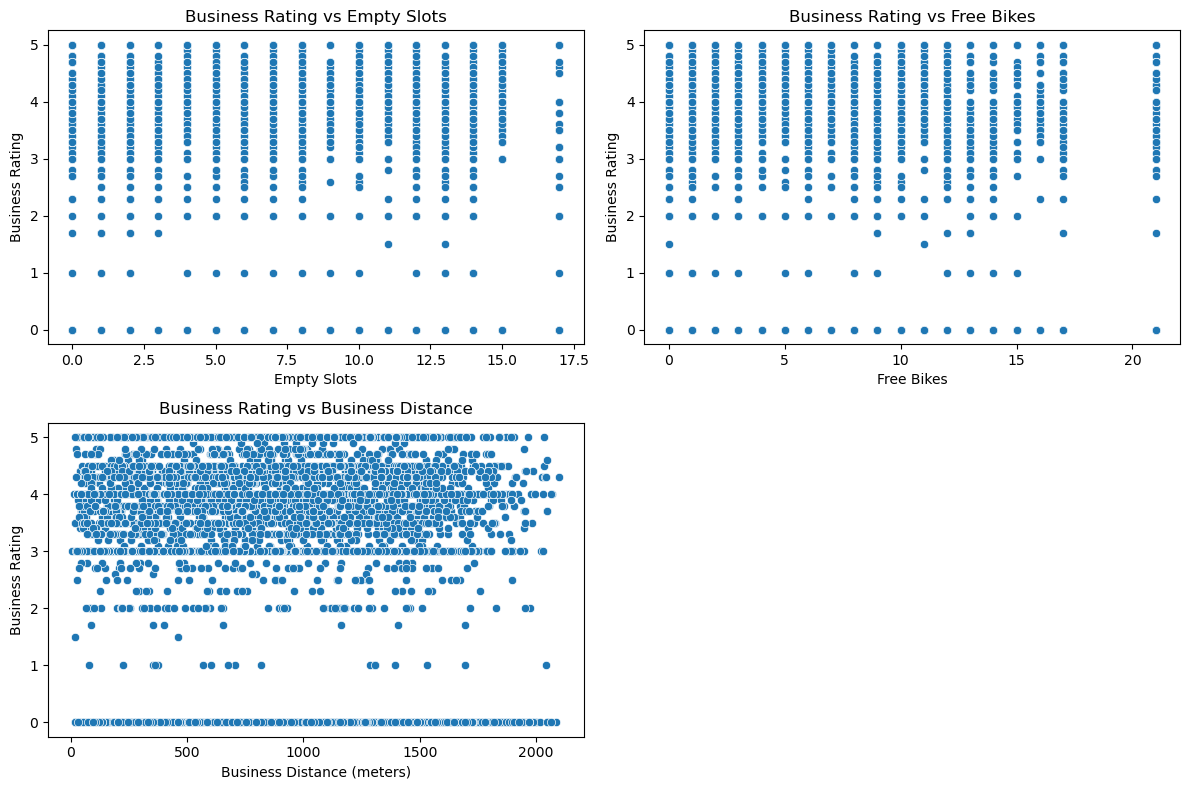

In [12]:


# Data (assuming your dataset is in a DataFrame called 'merged_result')
# Adjust the dataset name if needed

# Set up the plot grid
plt.figure(figsize=(12, 8))

# Plot 1: Business Rating vs Empty Slots
plt.subplot(2, 2, 1)
sns.scatterplot(x='Empty Slots', y='Business Rating', data=merged_result)
plt.title('Business Rating vs Empty Slots')
plt.xlabel('Empty Slots')
plt.ylabel('Business Rating')

# Plot 2: Business Rating vs Free Bikes
plt.subplot(2, 2, 2)
sns.scatterplot(x='Free Bikes', y='Business Rating', data=merged_result)
plt.title('Business Rating vs Free Bikes')
plt.xlabel('Free Bikes')
plt.ylabel('Business Rating')

# Plot 3: Business Rating vs Business Distance
plt.subplot(2, 2, 3)
sns.scatterplot(x='Business Distance (meters)', y='Business Rating', data=merged_result)
plt.title('Business Rating vs Business Distance')
plt.xlabel('Business Distance (meters)')
plt.ylabel('Business Rating')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


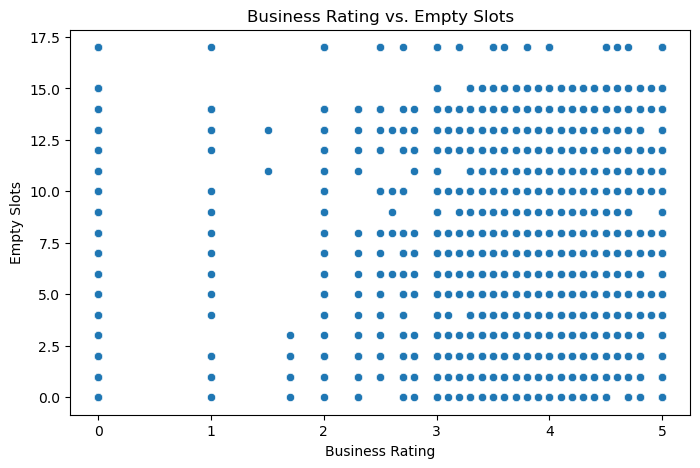

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_result, x='Business Rating', y='Empty Slots')
plt.title("Business Rating vs. Empty Slots")
plt.xlabel("Business Rating")
plt.ylabel("Empty Slots")
plt.show()


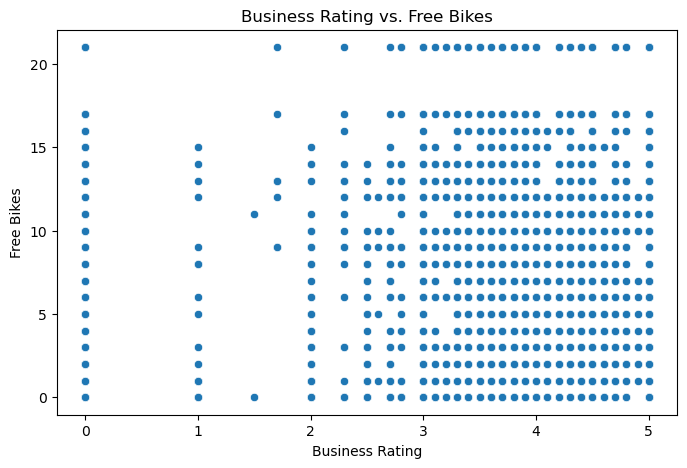

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_result, x='Business Rating', y='Free Bikes')
plt.title("Business Rating vs. Free Bikes")
plt.xlabel("Business Rating")
plt.ylabel("Free Bikes")
plt.show()


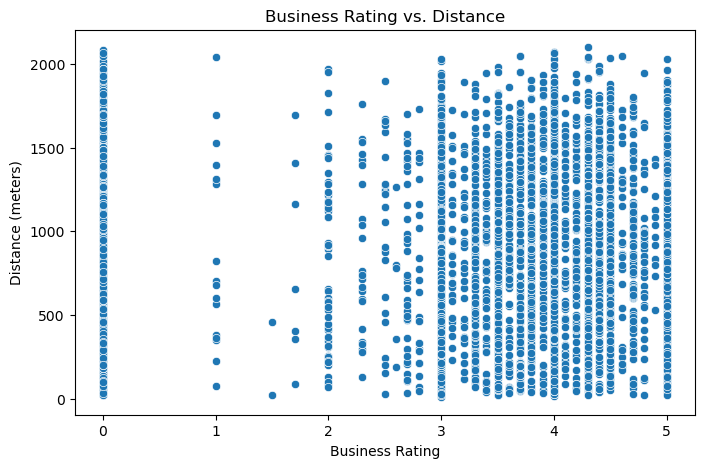

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_result, x='Business Rating', y='Business Distance (meters)')
plt.title("Business Rating vs. Distance")
plt.xlabel("Business Rating")
plt.ylabel("Distance (meters)")
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [3]:
import sqlite3
import pandas as pd

# Create a connection to the SQLite3 database
conn = sqlite3.connect(r"C:\Users\johnk\OneDrive\Desktop\Statistical-Modelling-Project\Statistical-Modelling-Project")
cursor = conn.cursor()

# Create a table (adjust the schema as needed)
cursor.execute('''
CREATE TABLE IF NOT EXISTS results (
    id INTEGER PRIMARY KEY,
    empty_slots INTEGER,
    free_bikes INTEGER,
    business_distance REAL,
    business_rating REAL
)
''')

# Assuming your results are in a DataFrame called 'merged_result'
# Insert data into the table
for index, row in merged_result.iterrows():
    cursor.execute('''
    INSERT INTO results (empty_slots, free_bikes, business_distance, business_rating)
    VALUES (?, ?, ?, ?)
    ''', (row['Empty Slots'], row['Free Bikes'], row['Business Distance (meters)'], row['Business Rating']))

# Commit the transaction and close the connection
conn.commit()
conn.close()


OperationalError: unable to open database file

Look at the data before and after the join to validate your data.